<a href="https://colab.research.google.com/github/FemiFaney/Femi/blob/main/ImgClas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [2]:
target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['Bag','Bat','Bathtub','Binocular','Cactus', 'Calculator', 'Chopsticks', 'Computer Keyboard',
              'Computer Monitor','Computer Mouse', 'Insect','Mug','Radio']

In [3]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #print(class_num)
  #print(category)
  path = os.path.join(DATADIR,category)
  #print(path)
  #df =[]
  for img in os.listdir(path):
    if(img.endswith("jpg")):
        #print(os.path.join(path,img))
        img_array = imread(os.path.join(path,img))
        #df.append(img_array)
        #print(img_array)
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [4]:
flat_data[0]

array([0.94926797, 0.97227887, 0.9287451 , ..., 0.81266667, 0.8205098 ,
       0.80090196])

In [5]:
len(flat_data[0])

67500

In [6]:
flat_data[0].shape

(67500,)

In [7]:
target

array([ 0,  0,  0, ..., 12, 12, 12])

<BarContainer object of 13 artists>

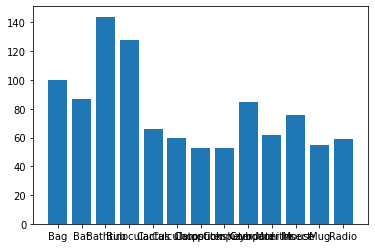

In [8]:
unique,count = np.unique(target,return_counts = True)
plt.bar(CATEGORIES,count)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.7, random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C': [1,10,100,1000], 'kernel': ['linear']},
              {'C': [1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel': ['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([ 1, 12,  0,  7,  9,  3,  3,  0,  2,  2,  3,  6,  1,  2,  8,  3, 12,
        2,  8,  0,  9,  2,  2,  8,  2,  3,  1,  2,  3,  1,  2,  1,  0,  1,
        4,  2,  0,  3,  2,  2,  2,  1,  4, 11,  4,  0,  0,  5,  1,  3,  0,
        0,  1,  2,  9,  8,  3,  3,  9,  9,  1,  7,  3, 10,  2,  3,  2,  1,
        3,  0,  0,  0, 10,  8,  1,  0,  2,  2,  3,  3,  8,  3,  4,  2, 10,
       10,  1, 12,  3,  9,  0,  2,  1,  8,  8,  2,  9,  8,  0,  4,  8,  9,
        0,  5,  3,  3,  2,  3,  3,  0,  0,  2,  9,  8,  2,  3,  1,  2,  2,
        1,  0,  3,  9,  2, 10,  1,  2,  3, 10,  2,  3,  0,  0,  3,  1, 11,
        1,  4,  2,  1,  2,  2,  5, 10,  0,  2,  2,  3,  3,  1, 10,  3,  3,
        2,  3,  6,  2,  2,  4, 10,  4,  2,  1,  1,  0,  1,  2,  2,  3, 10,
       12,  3, 12,  1,  9,  1,  3,  0,  3,  5,  2,  2,  0,  9,  1,  0,  0,
        4,  2,  7,  3, 10,  2,  1,  2,  0,  1,  8,  2,  1,  3,  2,  8,  2,
        2,  2,  1,  3,  9,  0,  9, 10,  9,  3,  2,  1,  9,  0,  3,  1,  2,
        1,  8,  0,  0,  2

In [ ]:
y_test

array([ 1, 12,  5,  9,  6, 12,  5,  0,  4,  4,  3,  6,  1,  2, 11,  8, 12,
        4,  8,  0,  8,  6,  2, 12,  3,  3,  1,  2,  8,  1,  1,  1,  3,  4,
        4, 12,  0,  8,  2, 10,  2, 10, 11,  8,  4,  0,  6, 10,  1,  3,  7,
        0,  6,  2, 11,  5,  3,  4, 11,  9,  1,  7,  3, 10,  4,  3,  1,  7,
        0,  0,  0,  0,  2,  9,  9,  7,  1,  7,  7,  3, 12,  3,  2,  1, 10,
       10, 12,  0,  7,  7,  5,  2,  8,  8,  8, 12, 11, 10, 11,  4,  3,  2,
        0, 11,  3,  3,  2,  7,  3, 12,  0,  1,  9,  8,  2,  7,  6,  2,  2,
        9,  0,  3,  8, 10,  9,  1,  2,  3, 10,  2,  3, 11, 12,  8,  9, 11,
        2,  1,  2,  5,  2,  2,  3, 10,  0, 11, 10,  3,  0,  1,  3,  1,  2,
        6,  2,  6,  7,  2,  8, 10,  1,  1,  8,  1,  6,  8,  2,  2,  3,  4,
       12,  3, 12,  6, 11,  1,  9,  6,  3, 11, 12, 10,  0,  3,  2,  0,  3,
        5,  4,  6,  3, 10,  2,  3, 10,  0,  1,  8,  6, 10,  3,  2,  8, 12,
        4,  4,  7,  0,  9,  7,  9,  3, 11,  3,  2,  7,  5,  7,  3,  2,  7,
        1,  5, 11,  8,  7

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.4013888888888889

In [ ]:
confusion_matrix(y_pred,y_test)

array([[51,  3,  2, 10,  0,  6,  7,  8,  3,  2,  1,  7,  3],
       [ 3, 29,  4,  6,  6,  5,  8,  6,  5,  8,  9,  4,  8],
       [ 6, 11, 76,  2, 29,  8,  6,  8,  7,  4, 12,  7, 10],
       [ 5,  1,  3, 58,  1,  9,  1,  5,  9,  3,  2,  1,  9],
       [ 0,  2,  1,  0,  8,  2,  1,  2,  3,  1,  1,  1,  0],
       [ 0,  0,  0,  3,  0,  2,  0,  0,  1,  0,  2,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  1,  2,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  3,  0,  1, 16,  5,  6,  1,  2],
       [ 1,  3,  3,  4,  0, 10,  3,  7, 10, 11,  1, 12,  2],
       [ 1,  0,  3,  2,  3,  0,  2,  1,  3,  1, 18,  2,  1],
       [ 0,  1,  2,  1,  0,  1,  0,  0,  2,  0,  1,  3,  0],
       [ 2,  1,  1,  2,  0,  0,  0,  0,  1,  2,  2,  0,  9]])

In [ ]:
filenames = []

target_test = []
images_test = []
flat_data_test = []


path_test = '/content/test'

for img in os.listdir(path_test):
    if(img.endswith("jpg")):
        filenames.append(img)
        #print(os.path.join(path,img))
        img_array_test = imread(os.path.join(path_test,img))
        img_resized_test = resize(img_array_test,(150,150,3))
        flat_data_test.append(img_resized_test.flatten())
        images_test.append(img_resized_test)

flat_data_test = np.array(flat_data_test)
images_test = np.array(images_test)

In [ ]:
target_test = clf.predict(flat_data_test)

NameError: ignored

In [ ]:
target_test

In [ ]:
plt.imshow(images_test[0])

In [ ]:
filenames

In [ ]:
target_tes = np.array(target_test)
labels = target_tes
labels = np.where(labels==0, CATEGORIES[0], labels)
labels = np.where(labels==1, CATEGORIES[1], labels)

In [ ]:
labels

In [ ]:
import pandas as pd
target_tes = pd.DataFrame(target_test)
target_tes

In [ ]:
target_tes = target_tes.replace(0, 'Bag')
target_tes = target_tes.replace(1, 'Bat')

In [ ]:
target_tes

In [ ]:
files = pd.DataFrame(filenames)
files

In [ ]:
output = pd.merge(files, target_tes, left_index=True, right_index= True)
output = output.rename(columns={'0_x': 'images', '0_y': 'labels'})
output

In [ ]:
# To download the csv file locally
from google.colab import files
df = pd.DataFrame(output)
df.to_csv('output.csv', index=False)
files.download('output.csv')